1.Simple Linear Regression_different dataset from the LAB

In [1]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=2)

In [2]:
def load_data_simple():
    data = np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_linear regression/houses.txt', delimiter=',')
    X = data[:,0]
    y = data[:,4]
    return X, y

In [3]:
x_single_train, y_single_train=load_data_simple()

In [4]:
x_single_train=x_single_train.reshape(-1,1) #the original 1D array with m elements has been reshaped into a 2D array with m rows and 1 column
y_single_train=y_single_train.reshape(-1,1)

Text(0.5, 0, 'Size in sqft')

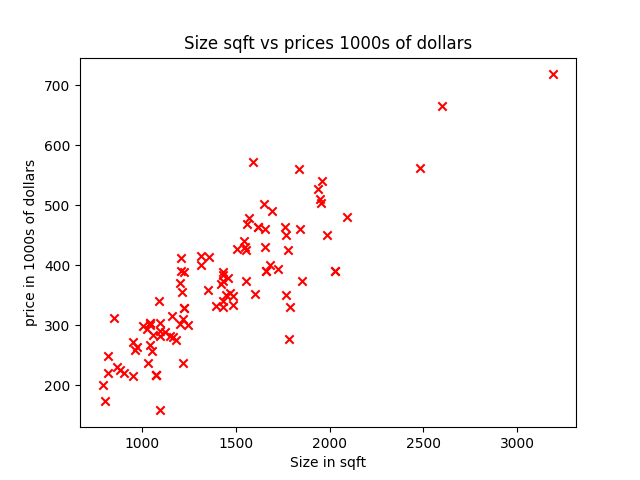

In [5]:
plt.scatter(x_single_train,y_single_train,marker="x",color="red")
plt.title("Size sqft vs prices 1000s of dollars")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("Size in sqft")

In [6]:
simple_regr=LinearRegression()
simple_regr.fit(x_single_train,y_single_train)

LinearRegression()

In [7]:
w_simple=simple_regr.coef_[0][0]
b_simple=simple_regr.intercept_[0]
print(f"w={w_simple:}, b={b_simple:0.2f}")


w=0.21631411338389775, b=56.43


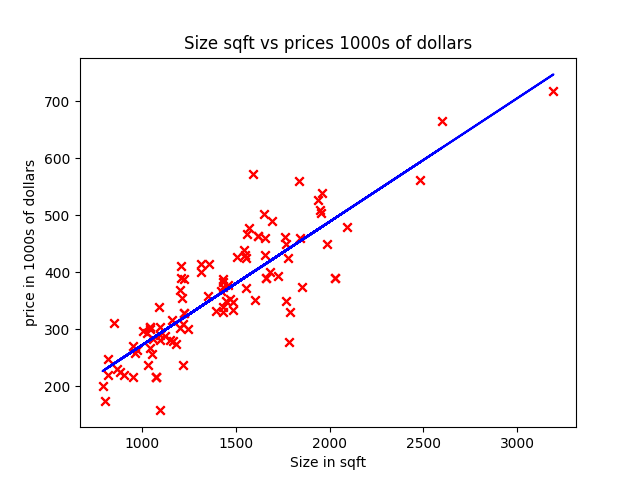

In [8]:
plt.scatter(x_single_train,y_single_train,marker="x",color="red")
plt.plot(x_single_train,w_simple*x_single_train+b_simple,'b')

plt.title("Size sqft vs prices 1000s of dollars")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("Size in sqft")


In [9]:
m=x_single_train.shape[0]
predicted_simple=np.zeros(m) #initializes an array of size m with zeros. This array will be used to store the predicted values of the linear regression model.

for i in range(m):
    predicted_simple[i]=w_simple*x_single_train[i]+b_simple



In [10]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f"%np.mean(np.absolute(predicted_simple-y_single_train)))
print("Residual sum of squares (MSE):%.2f"%np.mean((predicted_simple-y_single_train)**2))

print("R2-score:%.2f"%r2_score(predicted_simple,y_single_train))

Mean absolute error: 106.85
Residual sum of squares (MSE):18780.01
R2-score:0.64


In [11]:
def load_data_multi():
    data = np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_linear regression/houses.txt', delimiter=',')
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [12]:
x_multi_train,y_multi_train=load_data_multi()
X_features = ['sqft','bedrooms','floors','years old of age']

In [13]:
multi_regr=LinearRegression()
multi_regr.fit(x_multi_train, y_multi_train)

LinearRegression()

In [14]:
w_multi=multi_regr.coef_
b_multi=multi_regr.intercept_
print(f"w={w_multi:}, b={b_multi:0.2f}")

w=[  0.27 -32.9  -67.29  -1.47], b=221.50


In [15]:
x_house=np.array([1200,3,1,40]).reshape(-1,4) #The reshape function with -1 argument infers the number of rows based on the size of the input array, and the 4 argument specifies the number of columns to be 4. So, in this case, x_house will have 1 row and 4 columns, making it a 2D array.
x_house_predict=multi_regr.predict(x_house)[0]
print(f"Predicted price of a house with 1200 {X_features[0]},3 {X_features[1]}, 1 {X_features[2]}, 40 {X_features[0]}= ${x_house_predict*1000:0.2f}")


Predicted price of a house with 1200 sqft,3 bedrooms, 1 floors, 40 sqft= $318936.36


In [16]:
size=x_multi_train[:,0] #select the first column of the x_multi_train and assign it to x1.
bedrooms=x_multi_train[:,1]
floors=x_multi_train[:,2]
age=x_multi_train[:,3]

1. Pairplot: A pairplot can be used to visualize the relationship between pairs of variables. The seaborn library provides a convenient function for creating a pairplot.

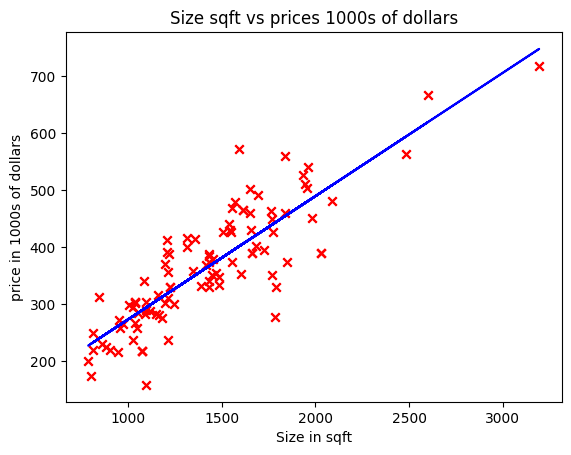

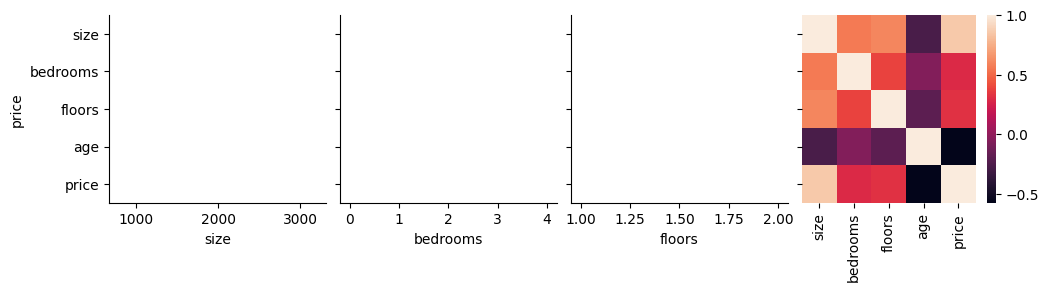

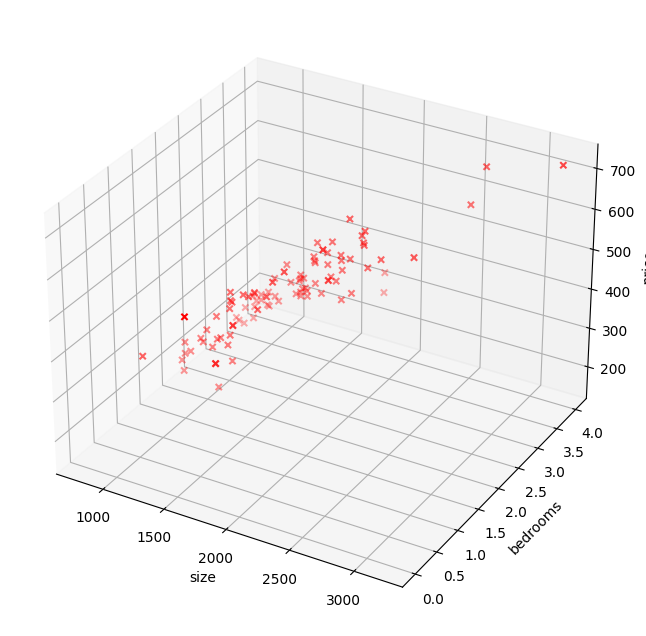

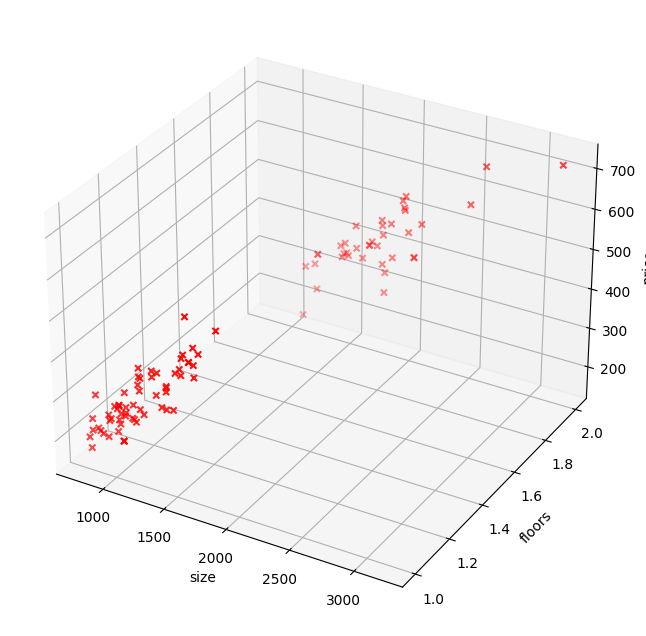

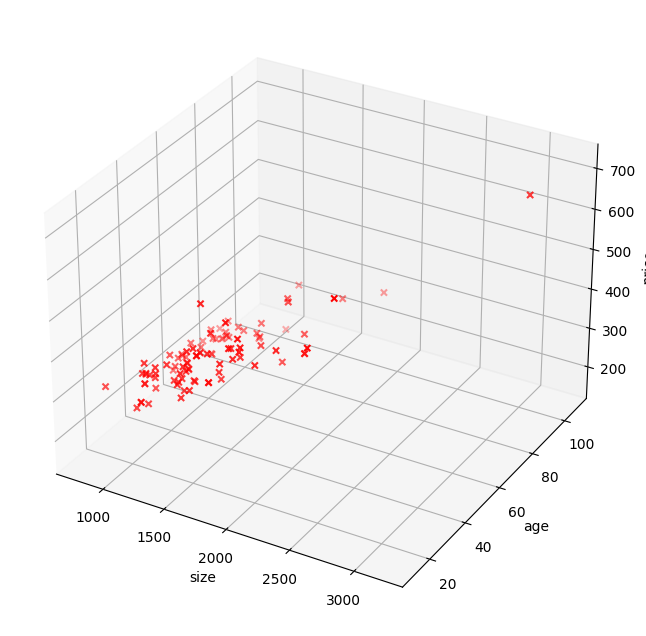

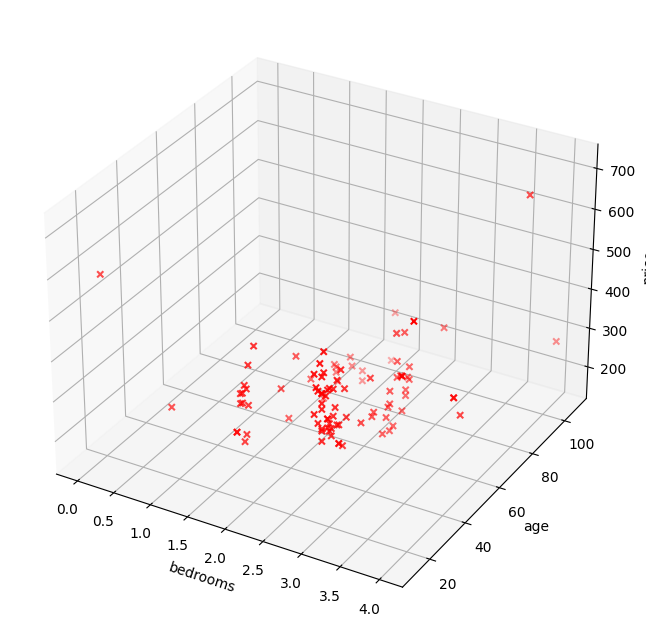

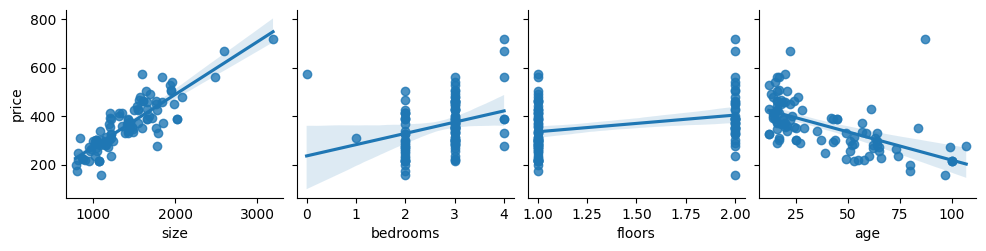

In [20]:
import seaborn as sns
import pandas as pd
%matplotlib inline


data=pd.DataFrame({'size':size,'bedrooms':bedrooms,'floors':floors,'age':age,'price':y_multi_train})

sns.pairplot(data,x_vars=['size','bedrooms','floors','age'],y_vars=['price'],kind='reg');

2. HeatMap: A heatmaps are commonly used to visually explore relationships between two variables.

In [18]:
sns.heatmap(data.corr())

#1 indicates perfect positive correlation
#-1 indicates perfect negative correlation
#0 indicates that there is no correlation

<Axes: >

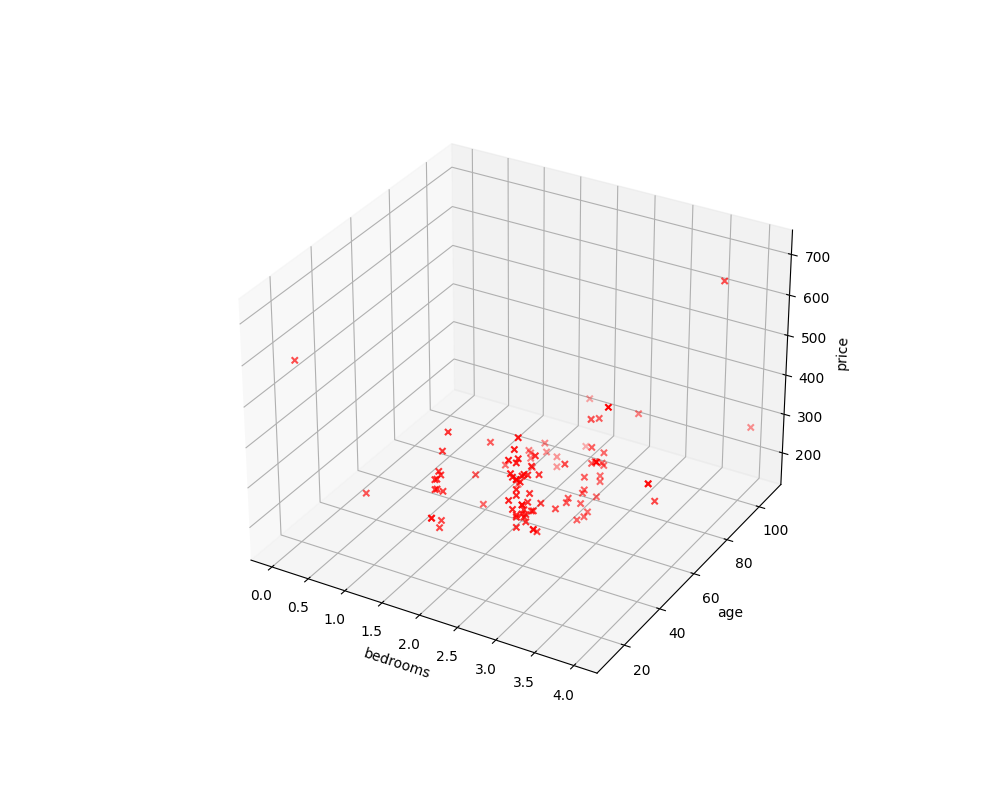

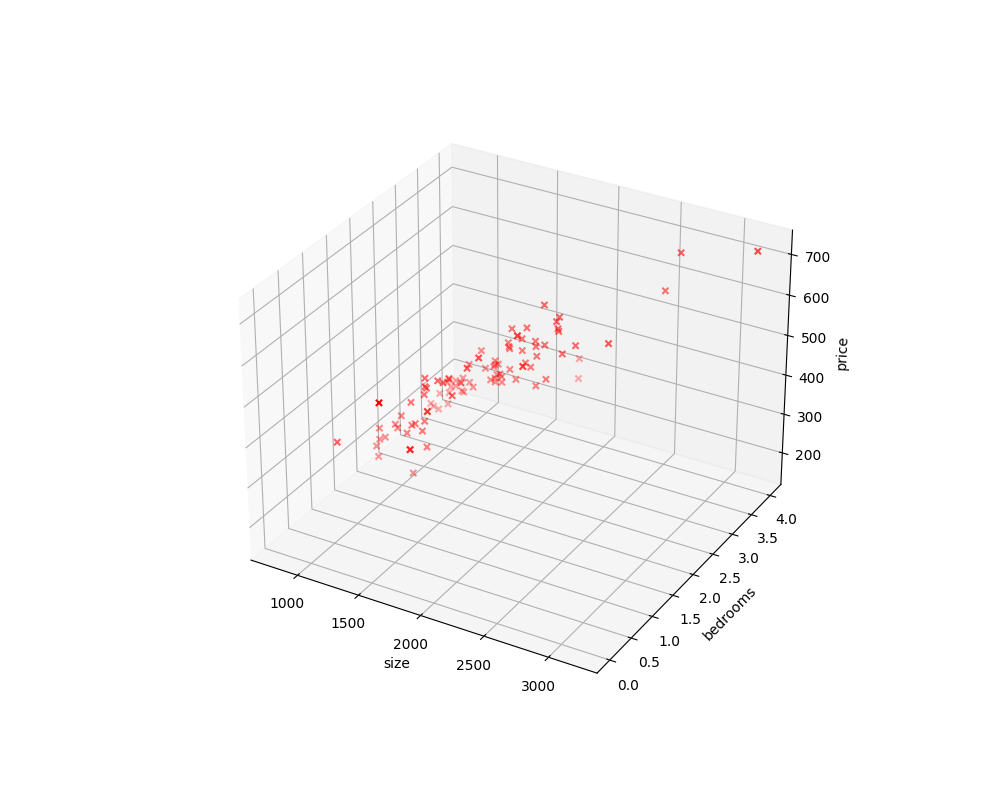

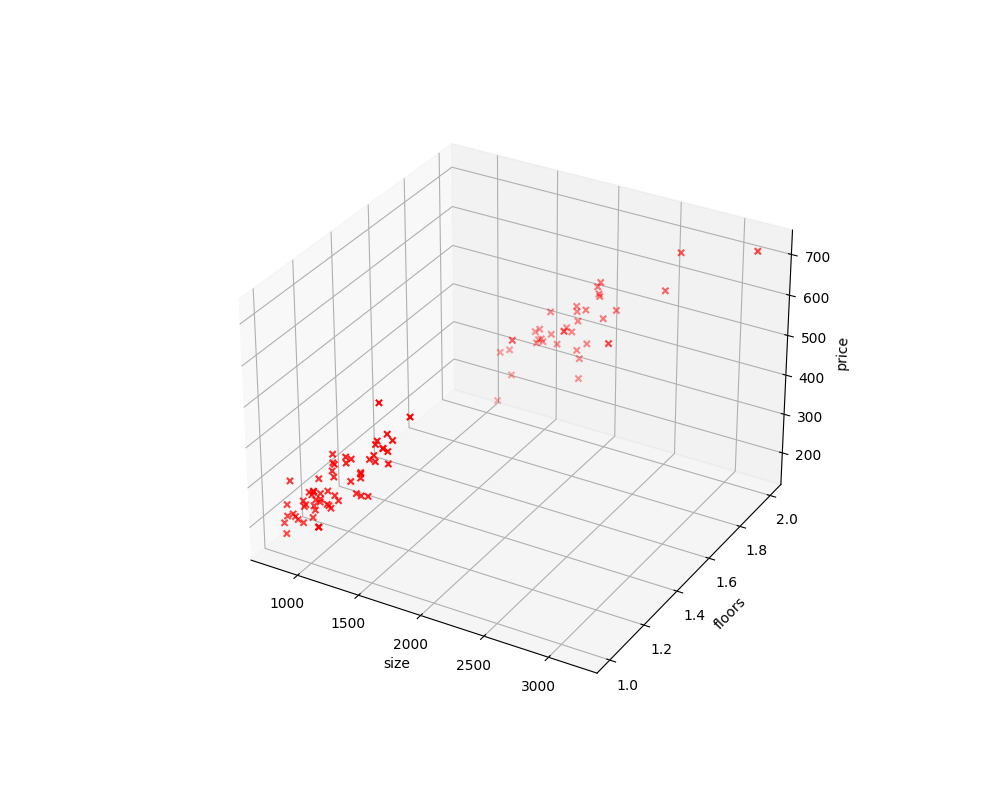

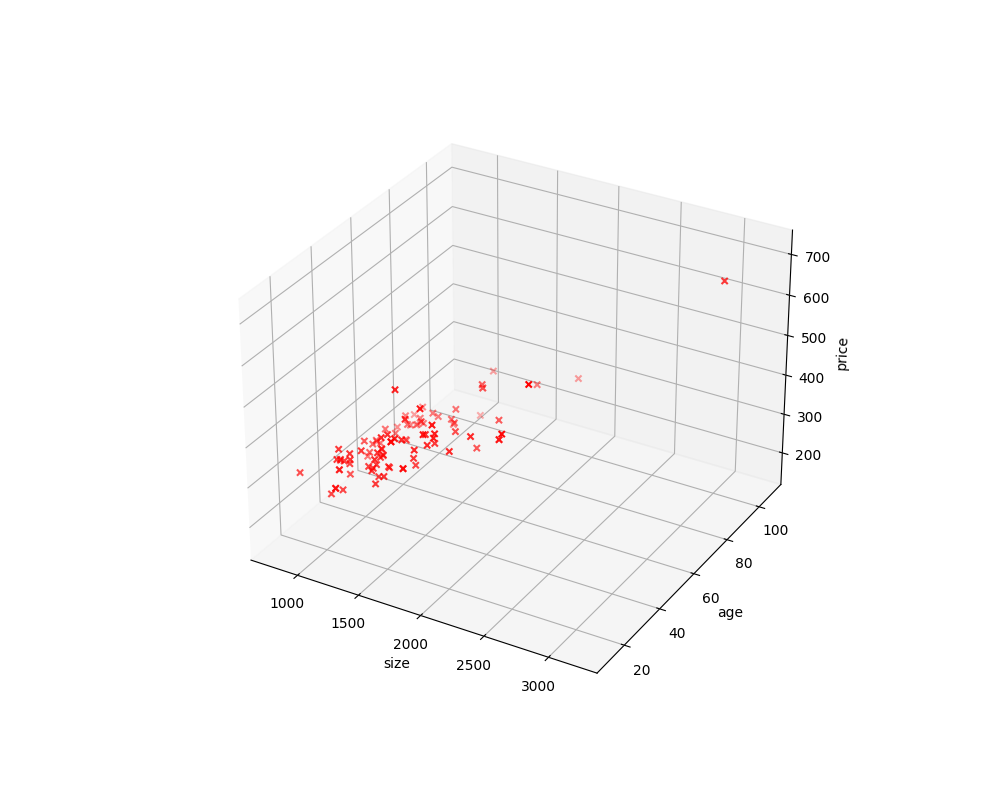

In [19]:
from mpl_toolkits.mplot3d import Axes3D

#create figure
fig1=plt.figure(figsize=(10,8))
fig2=plt.figure(figsize=(10,8))
fig3=plt.figure(figsize=(10,8))
fig4=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(111,projection="3d")
ax2=fig2.add_subplot(111,projection="3d")
ax3=fig3.add_subplot(111,projection="3d")
ax4=fig4.add_subplot(111,projection="3d")


ax1.scatter(data['size'],data['bedrooms'],data['price'],c="r",marker="x")
ax1.set_xlabel('size')
ax1.set_ylabel('bedrooms')
ax1.set_zlabel('price')

ax2.scatter(data['size'],data['floors'],data['price'],c="r",marker="x")
ax2.set_xlabel('size')
ax2.set_ylabel('floors')
ax2.set_zlabel('price')

ax3.scatter(data['size'],data['age'],data['price'],c="r",marker="x")
ax3.set_xlabel('size')
ax3.set_ylabel('age')
ax3.set_zlabel('price')

ax4.scatter(data['bedrooms'],data['age'],data['price'],c="r",marker="x")
ax4.set_xlabel('bedrooms')
ax4.set_ylabel('age')
ax4.set_zlabel('price')


plt.show()